#Import TVB modules

In [122]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib


#Simulate seizure
Create model with default parameters from tutorial. Use EEG, sEEG and temporal averages.

In [123]:
epileptors = models.Epileptor(Ks=-0.2, Kf=0.1, r=0.00015)
epileptors.x0 = np.ones((76))*-2.4 #-2.4 #set all brain regions non-epileptic
#epileptors.x0[[2,40]] = np.ones((2))*-1.9 #-1.8 #overwrite as epileptogenic; borderline epileptic ('close to epilepsy threshold')
epileptors.x0[[9]] = np.ones((3))*-1.6 #overwrite as epileptic neural populations
con = connectivity.Connectivity(load_default=True)
coupl = coupling.Difference(a=1.)
hiss = noise.Additive(nsig = numpy.array([0., 0., 0., 0.0003, 0.0003, 0.]))



#heunint = integrators.HeunStochastic(dt=0.05, noise=hiss)
heunint = integrators.HeunDeterministic(dt=0.01)



# load the default region mapping
rm = region_mapping.RegionMapping(load_default=True)

#Initialise some Monitors with period in physical time
mon_tavg = monitors.TemporalAverage(period=1.)

mon_SEEG = monitors.iEEG(load_default=True,
                         region_mapping=rm,
                         period=1.)

#Bundle them
what_to_watch = (mon_tavg, mon_SEEG)

#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=epileptors, connectivity=con,
                          coupling=coupl, 
                          integrator=heunint, monitors=what_to_watch)

sim.configure()



WARNING  File 'hemispheres' not found in ZIP.


initial_conditions,None
coupling,Difference(a=1)
stimulus,None
integrator,HeunDeterministic(dt=0.01)
surface,None
connectivity,"Connectivity(bound=False, value=None)"
conduction_speed,3.0
simulation_length,1000.0
model,"Epileptor(bound=False, value=None)"
monitors,"(TemporalAverage(bound=False, value=None), iEEG(bound=False, value=None))"


In [15]:
(ttavg, tavg), (tseeg, seeg) = sim.run(simulation_length=10000)

In [124]:
(ttest, dtest), (sttest, setest) = sim.run(simulation_length=10000)

Normalize, plot

In [17]:
t_raw = copy(ttavg)
d_raw = copy(tavg)

<IPython.core.display.Javascript object>


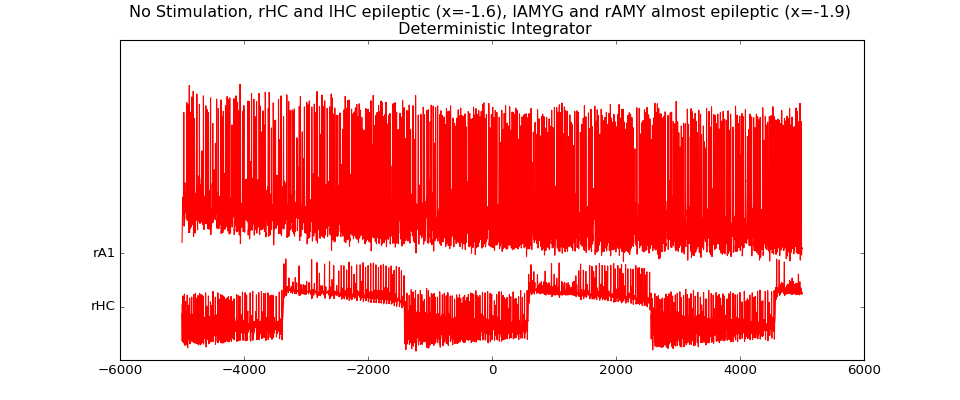

In [125]:
ttest_raw = copy(ttest)
dtest_raw = copy(dtest)

# Normalize the time series to have nice plots
dtest /= (np.max(tavg,0) - np.min(dtest,0 ))

#Plot raw time series
figure(figsize=(12,5))
#plot(ttavg[:], tavg[:, 0, :, 0] + np.r_[:76], 'r')
plot(ttest[:] - 5000, dtest[:, 0, [9,0], 0] + [1,2], 'r')
yticks([1,2], con.region_labels[[9,0]])
title("No Stimulation, rHC and lHC epileptic (x=-1.6), lAMYG and rAMY almost epileptic (x=-1.9) \n Deterministic Integrator")

<IPython.core.display.Javascript object>


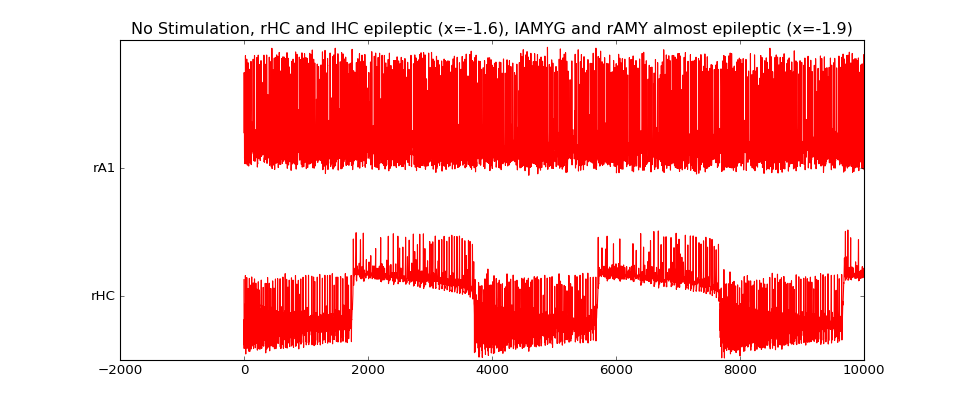

In [120]:
# Normalize the time series to have nice plots
tavg /= (np.max(tavg,0) - np.min(tavg,0 ))

#Plot raw time series
figure(figsize=(12,5))
#plot(ttavg[:], tavg[:, 0, :, 0] + np.r_[:76], 'r')
plot(ttavg[:] - 5000, tavg[:, 0, [9,0], 0] + [1,2], 'r')
yticks([1,2], con.region_labels[[9,0]])
title("No Stimulation, rHC and lHC epileptic (x=-1.6), lAMYG and rAMY almost epileptic (x=-1.9)")


<IPython.core.display.Javascript object>


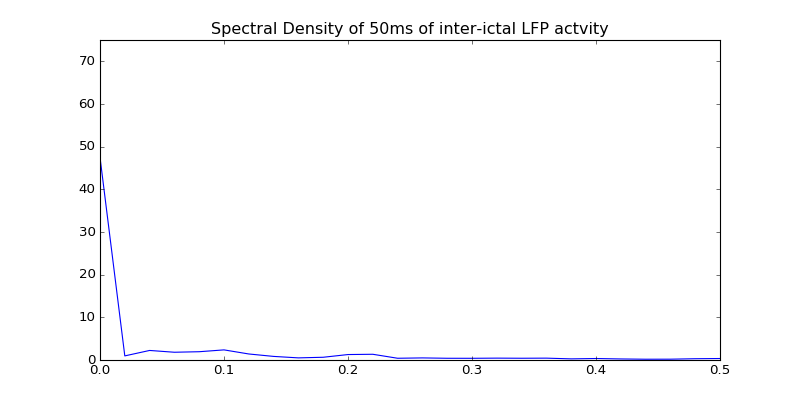

<IPython.core.display.Javascript object>


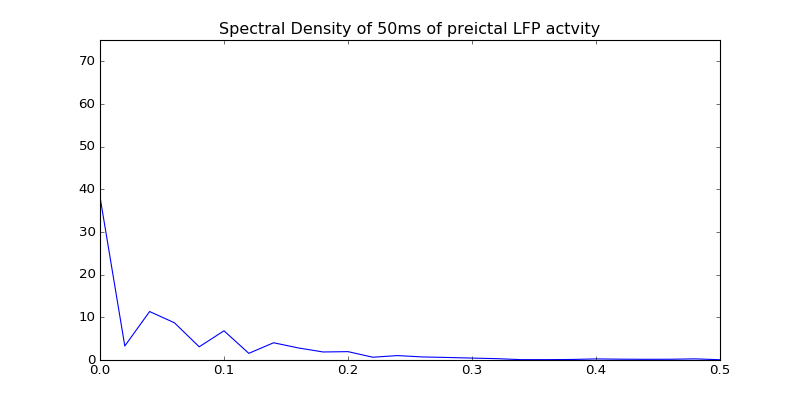

<IPython.core.display.Javascript object>


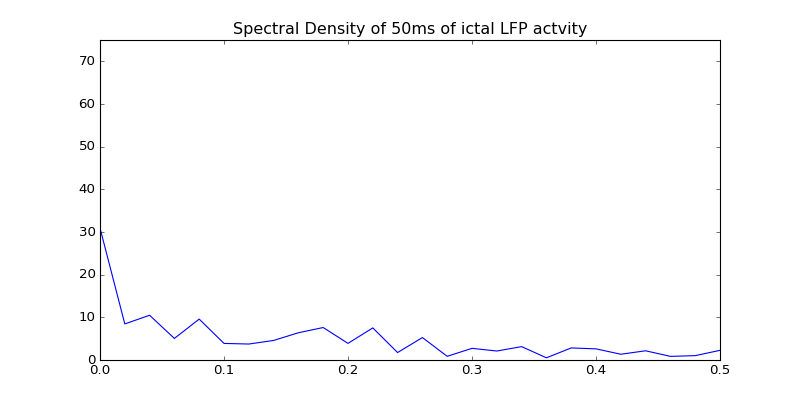

In [119]:
length = 50
ictal_start = 7663
intictal_start = 6000
preictal_start = 7000


fft_data_intictal = extract_fft(d_raw[intictal_start:intictal_start+length])
fft_data_ictal = extract_fft(d_raw[ictal_start:ictal_start+length])
fft_data_preictal = extract_fft(d_raw[preictal_start:preictal_start+length])


freq = []
for i in range(76):
    freq.append(np.fft.rfftfreq(length))
figure(figsize=(10,5))
ylim(0,75)
plot(freq[9], fft_data_intictal[9])
title("Spectral Density of " + str(length) + "ms of inter-ictal LFP actvity")
show()

figure(figsize=(10,5))
ylim(0,75)
plot(freq[9], fft_data_preictal[9])
title("Spectral Density of " + str(length) + "ms of preictal LFP actvity")
show()

figure(figsize=(10,5))
ylim(0,75)
plot(freq[9], fft_data_ictal[9])
title("Spectral Density of " + str(length) + "ms of ictal LFP actvity")
show()



In [118]:
i = 0
for f in freq:
    if freq <= 0.1:
        

array([  0.00000000e+00,   1.00000000e-05,   2.00000000e-05, ...,
         4.99980000e-01,   4.99990000e-01,   5.00000000e-01])

In [59]:
def extract_fft(d):
    
    fd = []
    for i in range(76):
        fd.append([])
    
    for dt in d:
        i = 0
        for region in dt[0]:
            fd[i].append(region[0])
            i += 1
        
    data_fft = []
    for region in fd:
        data_fft.append(fft.rfft(region))
        
    return abs(np.array(data_fft))



In [ ]:
#Normalize SEEG data
seeg /= 5*(np.max(seeg,0) - np.min(seeg,0 ))
seeg -= np.mean(seeg, 0)

#SEEG has 588 traces
traces_displayed = 588
figure(figsize=(10,traces_displayed/3))



#Plot SEEG data
plot(tseeg[:], 10*seeg[:, 0, :traces_displayed, 0] + 2*np.r_[:traces_displayed])
yticks(2*np.r_[:traces_displayed], mon_SEEG.sensors.labels[:traces_displayed])
ylim([-2,traces_displayed*2 +2])
title("Epileptor with rHC and lHC epileptic regions. \n No Stimulation.")